**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import time
import optuna



from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config
from sklearn.metrics import confusion_matrix
import os

In [2]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier


from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [3]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder


**Importing the data**

In [4]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
#Converting the boolean data
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


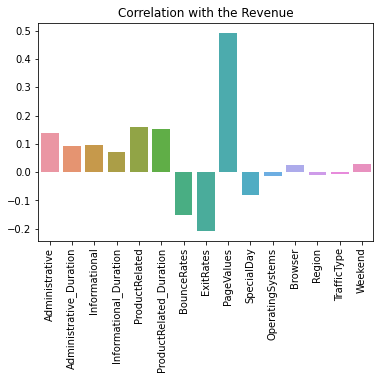

In [6]:
data_corr = df.corr()['Revenue'] 
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values).set_title('Correlation with the Revenue')
plt.xticks(rotation = 90)
plt.show()

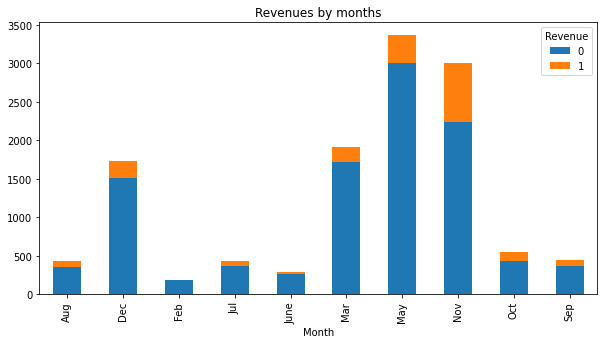

In [7]:
df.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Revenues by months')
plt.show()

**Data Profile**

In [8]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

KeyboardInterrupt: 

**Pipelines:**

In [ ]:
len(df.columns)

18

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [10]:
cat_vars  = ['Informational', 'Browser', 'Region', 'VisitorType', 'Weekend', 'Month', 'OperatingSystems', 'TrafficType', 'SpecialDay', 'Administrative']
num_vars  = ['Administrative_Duration',  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

In [19]:
# Modified pipeline (FINAL TREE)
num_4_tree = pipeline.Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('powertransformer',  PowerTransformer(method= 'yeo-johnson')),
   
    #('outliers', IsolationForest())
    #('outliers',LocalOutlierFactor() )
    #('outliers', OutlierExtraction())

    
    #('imputer', impute.SimpleImputer(strategy='mean', add_indicator=False)),
])

cat_4_tree = pipeline.Pipeline(steps=[
    #('imputer', impute.SimpleImputer(strategy='constant')),
    #('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999))

])
tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_tree, num_vars),
    ('cat', cat_4_tree, cat_vars)
], remainder='drop')

# Preprossing pipeline Tree
tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_tree, num_vars),
    ('cat', cat_4_tree, cat_vars)
], remainder='drop')

import pickle
Pkl_Filename = "model_prepro.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(tree_prepro, file)

In [16]:
#Mult Preprossing  
num_4_mult = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=True)), # mean, median
    ('scaler', preprocessing.StandardScaler()),
    ('powertransformer',  PowerTransformer(method= 'box-cox'))
])

cat_4_mult = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999))
    #('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))

])


mult_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_mult, num_vars),
    ('cat', cat_4_mult, cat_vars)
], remainder='drop')

In [ ]:
mult_models = {
  "LogRegr":        LogisticRegression(),
  "Ridge":          RidgeClassifier(),
  "SVM_lin":         SVC(kernel="linear", probability=True), # C=0.025
  "SVM_rbf":         SVC(kernel='rbf', probability=True),
  #"NuSVC":           NuSVC(probability=True),
  "LinearSVC":       LinearSVC(),
  "KNN3":            KNeighborsClassifier(3),
  "KNN5":            KNeighborsClassifier(5),
  "GaussianNB":      GaussianNB()
}

tree_models = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees": ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier(),
  "AdaBoost": AdaBoostClassifier(),
  "Skl GBM": GradientBoostingClassifier(),
  "Skl HistGBM": GradientBoostingClassifier(),
  "XGBoost": XGBClassifier(),
  'LightGBM': LGBMClassifier(),
  'CatBoost': CatBoostClassifier()}

In [ ]:
mult_classifiers = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_models.items()}
tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_models.items()}

models = {**mult_classifiers, **tree_classifiers}

In [17]:
x= df.drop(columns=['Revenue'])
y= df["Revenue"]

x_train, x_val, y_train, y_val = model_selection.train_test_split(
    x, y,
    test_size=0.2,
    stratify = y,   # ALWAYS RECOMMENDED FOR BETTER VALIDATION
    random_state=4  # Recommended for reproducibility
)

x_train_prepro  = tree_prepro.fit_transform(x_train) 
x_val_prepro    = tree_prepro.transform(x_val)
#x_train, x_val, y_train, y_val = model_selection.train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)



In [14]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in models.items():
    
    start_time = time.time()
    model.fit(x_train,y_train)
    pred = model.predict(x_val)
    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              


NameError: name 'models' is not defined

In [ ]:
results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

,Model,Accuracy,Bal Acc.,Time
1,Random Forest,90.510949,77.816648,1.914992
2,Skl HistGBM,90.389294,77.958467,2.671433
3,Skl GBM,90.389294,77.958467,2.491009
4,LightGBM,89.943228,77.373858,34.688272
5,CatBoost,89.902676,77.136070,18.232287
6,AdaBoost,89.699919,77.443700,0.841204
7,Extra Trees,89.659367,76.136935,1.313289
8,LogRegr,89.497161,78.606511,0.502752
9,XGBoost,89.416058,76.420572,34.722424
10,SVM_rbf,89.375507,73.724136,18.990476


**Model Optimization**

In [ ]:
def objective(trial):

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100,500)

    rf = sklearn.ensemble.RandomForestClassifier(criterion =criterion,
            max_depth=max_depth, 
            n_estimators=n_estimators
        )

    score = cross_val_score(rf, x_train_prepro,y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-05-14 13:53:00,806] A new study created in memory with name: no-name-1929d70d-8ec8-4b52-83fc-65a1a372b07e
[I 2021-05-14 13:53:06,101] Trial 0 finished with value: 0.8452960259529604 and parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 338}. Best is trial 0 with value: 0.8452960259529604.
[I 2021-05-14 13:53:20,366] Trial 1 finished with value: 0.8447891321978913 and parameters: {'criterion': 'gini', 'max_depth': 21, 'n_estimators': 274}. Best is trial 0 with value: 0.8452960259529604.
[I 2021-05-14 13:53:38,906] Trial 2 finished with value: 0.8447891321978913 and parameters: {'criterion': 'gini', 'max_depth': 19, 'n_estimators': 364}. Best is trial 0 with value: 0.8452960259529604.
[I 2021-05-14 13:53:49,818] Trial 3 finished with value: 0.8433698296836983 and parameters: {'criterion': 'entropy', 'max_depth': 32, 'n_estimators': 135}. Best is trial 0 with value: 0.8452960259529604.
[I 2021-05-14 13:53:54,410] Trial 4 finished with value: 0.8452960259529604 and 

Best prediction model Random Forrest

Best hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 338}


Plotting the optimization

In [ ]:
#Optimization History
optuna.visualization.plot_optimization_history(study)

In [ ]:
#Slice plot
optuna.visualization.plot_slice(study)

**Fitting the best model**

In [18]:

best_model = RandomForestClassifier(criterion= 'gini', max_depth= 2, n_estimators= 338) 
#best_model.fit(x_val,y_val)
best_model.fit(x_train_prepro,y_train)
test_predict= best_model.predict(x_val_prepro)
print("Accuracy:",metrics.accuracy_score(test_predict, y_val))


Accuracy: 0.8450932684509327


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_predict, y_val)
cm

array([[2084,  382],
       [   0,    0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_predict, y_val)

0.8450932684509327

In [ ]:
#PICKLE MODEL
import pickle
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(best_model, file)

In [ ]:
from sklearn import ensemble

classifier=ensemble.RandomForestClassifier(n_jobs=-1)
param_grid={"n_estimators":[100,200,300,400], "max_depth":[1,3,5,7], "criterion":["gini","entropy"]}

model=model_selection.GridSearchCV( estimator=classifier, param_grid=param_grid, scoring="accuracy", verbose=10, n_jobs=1,cv=5)

model.fit(x_train_prepro,y_train)
print(model.best_score_)
print()

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/5; 1/32] END criterion=gini, max_depth=1, n_estimators=100;, score=0.845 total time=   4.3s
[CV 2/5; 1/32] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/32] END criterion=gini, max_depth=1, n_estimators=100;, score=0.845 total time=   0.9s
[CV 3/5; 1/32] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/32] END criterion=gini, max_depth=1, n_estimators=100;, score=0.845 total time=   0.7s
[CV 4/5; 1/32] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/32] END criterion=gini, max_depth=1, n_estimators=100;, score=0.845 total time=   0.8s
[CV 5/5; 1/32] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/32] END criterion=gini, max_depth=1, n_estimators=100;, score=0.845 total time=   0.7s
[CV 1/5; 2/32] START criterion=gini, max_de

KeyboardInterrupt: 

In [ ]:
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["Skl HistGBM", "RandomForest"])
    
    # Step 2. Setup values for the hyperparameters:

    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    classifier_obj = ensemble.RandomForestClassifier(
        max_depth=rf_max_depth, n_estimators=rf_n_estimators
    )

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, x_train_prepro , y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2021-05-14 14:46:38,567] A new study created in memory with name: no-name-11075261-ffb0-4039-a28a-4a224dddd96b


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=804f48d7-d046-457b-abb3-20f3bd6cf15e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>